In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import math
import random
import time

In [0]:
def calculatekClusters(pdataset,k,maxIter,k_colors):
    #10 point,3,5
    k_indexes = random.sample(range(0,len(pdataset)-1),k)
    results = {} 
    k_centriods=[]    
    index = 0
    for k_index in k_indexes:
        k_centriods.append(pdataset[int(k_index)])
        index = index + 1        
    print(k_indexes)
    plt.scatter(pdataset[:,0],pdataset[:,1],s=50,c='black')
    #plt.scatter(k_centriods[0],k_centriods[1],s=75,c='green')
    

    #print(pdataset[0])
    
    counter = 1
    while counter<=maxIter:
        results={}
        number_of_shuffles = 0
        print("******** Iteration-"+str(counter)+" *************************")
        point_index = 0
        for x_value in pdataset:
            min_distance = 1000.0
            s_k_index = -1
            cluster_id = 0
            m_cluster_id = 0
            x_index = 0
            for x_centriod in k_centriods:
              eu_distance = calculateEuclideanDistance(x_centriod,x_value)
              if eu_distance<min_distance:                    
                min_distance = eu_distance
                s_k_index = cluster_id
                m_cluster_id=cluster_id+1
                number_of_shuffles = number_of_shuffles + 1
              cluster_id = cluster_id + 1
              piont_encode_key="Cluster"+str(m_cluster_id)+"-"+str(point_index)
            results[piont_encode_key]=x_value
            plt.scatter(x_value[0],x_value[1],s=50,c=k_colors[m_cluster_id-1])
            point_index = point_index + 1
        
        for x_centriod in k_centriods:
          plt.scatter(x_centriod[0],x_centriod[1],s=100,c='black')
        plt.show()
        #time.sleep(2)
        plt.clf()
        counter = counter + 1
        
        #print(results)
        print("Number of Shuffles are ",number_of_shuffles)
        print("******** centriods *************************")
        print(k_centriods)        
        #if counter<=maxIter:
          #plt.scatter(k_centriods[:,0],k_centriods[:,1],s=100,c='red')
        k_centriods=recalculateCentriod(results)        
    return results  

In [0]:
def calculatekClustersWithTextualLogs(pdataset,k,maxIter):
    #10 point,3,5
    k_indexes = random.sample(range(0,len(pdataset)-1),k)
    results = {} 
    k_centriods=[]    
    index = 0
    for k_index in k_indexes:
        k_centriods.append(pdataset[int(k_index)])
        index = index + 1        
    print(k_indexes)
    #plt.scatter(pdataset[:,0],pdataset[:,1],s=50,c='black')
    #plt.scatter(k_centriods[0],k_centriods[1],s=75,c='green')
    

    #print(pdataset[0])
    
    counter = 1
    while counter<=maxIter:
        results={}
        number_of_shuffles = 0
        print("******** Iteration-"+str(counter)+" *************************")
        point_index = 0
        for x_value in pdataset:
            min_distance = 1000.0
            s_k_index = -1
            cluster_id = 0
            m_cluster_id = 0
            x_index = 0
            for x_centriod in k_centriods:
              eu_distance = calculateEuclideanDistance(x_centriod,x_value)
              if eu_distance<min_distance:                    
                min_distance = eu_distance
                s_k_index = cluster_id
                m_cluster_id=cluster_id+1
                number_of_shuffles = number_of_shuffles + 1
              cluster_id = cluster_id + 1
              piont_encode_key="Cluster"+str(m_cluster_id)+"-"+str(point_index)
            results[piont_encode_key]=x_value
            plt.scatter(x_value[0],x_value[1],s=50,c=k_colors[m_cluster_id-1])
            point_index = point_index + 1
        
        
        counter = counter + 1
        
        print(results)
        print("Number of Shuffles are ",number_of_shuffles)
        print("******** centriods *************************")
        print(k_centriods)        
        #if counter<=maxIter:
          #plt.scatter(k_centriods[:,0],k_centriods[:,1],s=100,c='red')
        k_centriods=recalculateCentriod(results)        
    return results  

In [0]:
def recalculateCentriod(p_results):    
    k_centriods = []
    k_clusters = [] # storing Tags into k_clusters    
    
    i_index = 0
    for i_key,i_value in p_results.items():       
        clusterId=i_key[0:i_key.index("-")]

        if len(k_clusters)==0:
            k_clusters.insert(0,clusterId)
            i_index=k_clusters.index(clusterId)
            k_centriods.insert(i_index,i_value)

        else:
            if clusterId in k_clusters:                
                i_index=k_clusters.index(clusterId)
                k_centriods[i_index]=(k_centriods[i_index]+i_value)/2
            else:
                k_clusters.append(clusterId)
                i_index=k_clusters.index(clusterId)
                k_centriods.insert(i_index,i_value)       

    return k_centriods    

In [0]:
def calculateEuclideanDistance(point_item,point):
  eucldian_distance=math.sqrt(np.sum(np.subtract(point_item,point)*np.subtract(point_item,point)))
  return eucldian_distance

In [0]:
pdataset = (np.random.rand(1000)*100).reshape(500,2)

In [0]:
#print(type(pdataset))
print(pdataset)

[[6.68251913e+01 1.41332419e+01]
 [3.39852119e+01 5.39472982e+01]
 [3.42704975e+01 8.42852657e+01]
 [3.44518069e+01 8.21842206e+01]
 [9.49911068e+01 3.04393031e+01]
 [2.45993372e+01 6.41279492e+00]
 [2.71872245e+01 3.98320761e+01]
 [4.39950512e+01 2.17530324e+01]
 [2.14719510e+01 7.46008688e+01]
 [4.96661366e+01 3.07912380e+01]
 [9.18168216e+01 2.78416695e+00]
 [8.02973447e+01 3.95815231e+01]
 [2.70717211e+01 1.17803935e+01]
 [4.10530952e+01 9.66720594e+01]
 [3.98927610e+01 6.77337399e+01]
 [9.76191579e+01 1.44296658e+01]
 [3.79010598e+01 1.88273898e+01]
 [3.64618425e+01 4.29323724e+01]
 [9.74518295e+01 4.37886908e+01]
 [4.91116813e+01 3.41487616e+00]
 [6.49882257e+01 5.44681913e+01]
 [8.48808364e+01 8.73869664e+00]
 [4.68435830e+01 2.20724889e+01]
 [9.94438409e+01 4.41230091e+01]
 [7.82397615e+01 3.56261397e+01]
 [1.98823555e+01 1.97411975e+00]
 [6.94602773e+01 7.42284819e+00]
 [9.69735663e+01 9.85081132e+01]
 [9.90655700e+01 1.64747540e+01]
 [2.98683656e+01 2.51334608e+01]
 [1.884261

In [0]:
k_colors=['red','green','blue','yellow','indigo']
k = 5
max_Iter = 10

[278, 393, 105, 312, 461]
******** Iteration-1 *************************


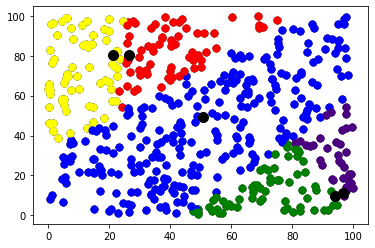

Number of Shuffles are  1069
******** centriods *************************
[array([26.45060455, 80.20875806]), array([93.99265561,  9.8832627 ]), array([50.6117319 , 49.23274297]), array([21.4021222 , 80.45242621]), array([96.54538805, 11.30184278])]
******** Iteration-2 *************************


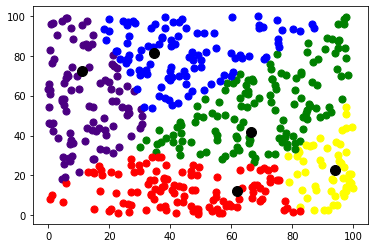

Number of Shuffles are  1175
******** centriods *************************
[array([61.78338251, 12.0973496 ]), array([66.29060406, 41.77318798]), array([34.55523771, 81.26260712]), array([94.01472407, 22.57168942]), array([11.10723919, 72.44680533])]
******** Iteration-3 *************************


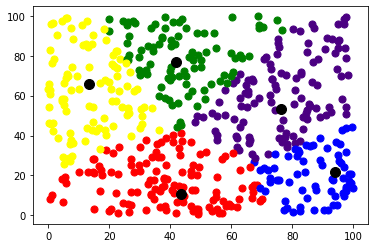

Number of Shuffles are  1082
******** centriods *************************
[array([43.47360173, 10.91074382]), array([41.83171956, 77.08389454]), array([93.88491435, 21.93511491]), array([13.26925877, 65.88151277]), array([76.36495001, 53.49772536])]
******** Iteration-4 *************************


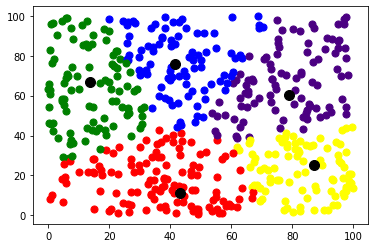

Number of Shuffles are  1137
******** centriods *************************
[array([43.3577783 , 11.09767346]), array([13.78221839, 67.00818366]), array([41.46302824, 75.8156255 ]), array([86.93998386, 25.28274216]), array([78.86713217, 60.41795823])]
******** Iteration-5 *************************


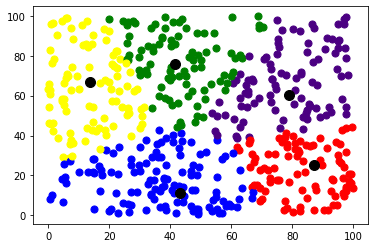

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
******** Iteration-6 *************************


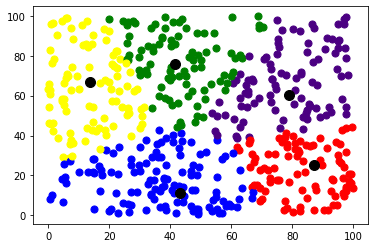

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
******** Iteration-7 *************************


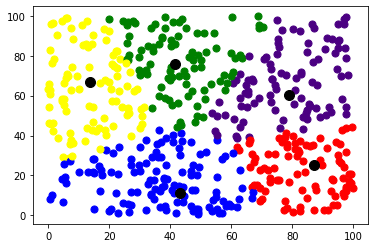

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
******** Iteration-8 *************************


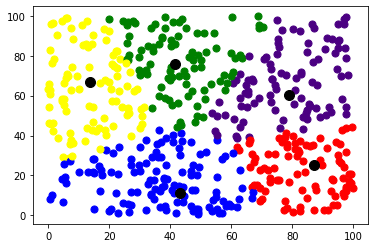

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
******** Iteration-9 *************************


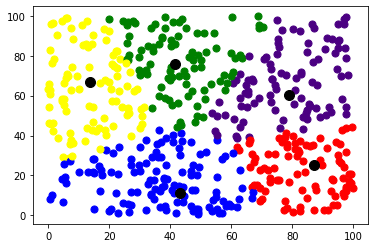

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
******** Iteration-10 *************************


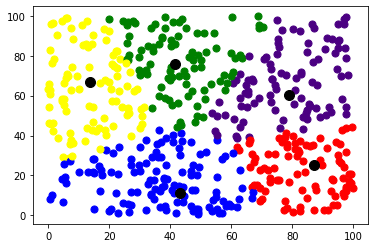

Number of Shuffles are  1128
******** centriods *************************
[array([86.9276128 , 25.30653053]), array([41.4131601 , 75.82547596]), array([43.35777817, 11.09767346]), array([13.78221849, 67.00818399]), array([78.78529041, 60.50327754])]
<Figure size 432x288 with 0 Axes>

In [0]:
k_means_result=calculatekClusters(pdataset,k,10,k_colors)

In [0]:
pdatasetNew = (np.random.rand(100)*100).reshape(50,2)

[27, 12, 30, 33]
******** Iteration-1 *************************
{'Cluster1-0': array([95.62926935, 67.25831504]), 'Cluster4-1': array([76.21886455, 83.56481032]), 'Cluster2-2': array([62.74625572, 15.2033331 ]), 'Cluster2-3': array([48.94016516, 17.72940114]), 'Cluster4-4': array([40.97946505, 58.55053965]), 'Cluster1-5': array([55.93602201, 42.06078568]), 'Cluster3-6': array([22.40914455,  1.90914261]), 'Cluster3-7': array([ 9.12321597, 65.06201157]), 'Cluster2-8': array([41.78203829,  7.00104514]), 'Cluster1-9': array([46.33421215, 25.04525861]), 'Cluster4-10': array([70.14546401, 92.61636511]), 'Cluster2-11': array([81.66418436,  1.53272633]), 'Cluster2-12': array([92.77094443, 29.41828382]), 'Cluster4-13': array([78.81470577, 77.55928754]), 'Cluster2-14': array([84.98904293, 36.60087228]), 'Cluster4-15': array([59.84875849, 60.19822192]), 'Cluster4-16': array([43.18610217, 60.4847647 ]), 'Cluster4-17': array([90.2676315 , 89.02149711]), 'Cluster1-18': array([79.96234327, 58.1080954

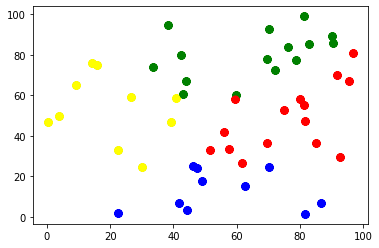

In [0]:
k_means_result=calculatekClustersWithTextualLogs(pdatasetNew,4,10)